# Enhancing Stock Price Prediction with Sentiment Analysis: A Comparison of LSTM Models

This module works to train the LSTM model on the historical stock data, lets us add the sentiment scores and also provides an evaluation of RMSE and MAE for the trained model.

Here is a list of ticker symbols from the report:





> *   EMBRAC-B.ST (Embracer Group AB)
*   EVO.ST (Evolution Gaming)
*   INVE-B (Investor AB)
*   KINV-B.ST (Kinnevik AB)
*   HM-B.ST (Hennes & Mauritz AB)
*   SAND.ST (Sandvik AB)










In [ ]:
ticker = 'EMBRAC-B.ST'
features = 6

In [ ]:
import time
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import sklearn.preprocessing as prep

df = yf.download(ticker, start='2021-01-01', end='2023-01-01')
df.head()
sc = prep.StandardScaler()
print(df)

[*********************100%***********************]  1 of 1 completed
                  Open        High        Low      Close  Adj Close   Volume
Date                                                                        
2022-01-03   96.510002  100.120003  96.000000  99.400002  99.400002  4923855
2022-01-04  100.000000  101.000000  94.709999  94.709999  94.709999  5050120
2022-01-05   95.000000   95.400002  92.540001  94.959999  94.959999  2190751
2022-01-07   93.220001   94.690002  90.000000  90.430000  90.430000  5112192
2022-01-10   91.000000   91.500000  86.699997  87.360001  87.360001  5555989
...                ...         ...        ...        ...        ...      ...
2022-12-23   50.299999   50.660000  49.250000  50.330002  50.330002  2457479
2022-12-27   50.349998   51.000000  49.580002  50.000000  50.000000  2267625
2022-12-28   50.080002   50.200001  48.439999  48.509998  48.509998  2427534
2022-12-29   48.154999   50.270000  47.939999  50.070000  50.070000  3447344
2022-12

Optional addition of sentiment

In [ ]:
df['Sentiment'] = sentiment
features = 7

NameError: ignored

##Plotting of the stock closing price over the past year

Text(0, 0.5, 'Prices ($)')

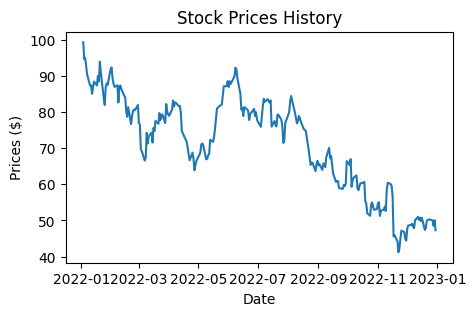

In [ ]:
plt.figure(figsize=(5, 3))
plt.title('Stock Prices History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

In [ ]:
def standard_scaler(X_train, X_test):
    train_samples, train_nx, train_ny = X_train.shape
    test_samples, test_nx, test_ny = X_test.shape
    
    X_train = X_train.reshape((train_samples, train_nx * train_ny))
    X_test = X_test.reshape((test_samples, test_nx * test_ny))
    preprocessor = sc.fit(X_train)
    print(X_train.shape)
    X_train = preprocessor.transform(X_train)
    X_test = preprocessor.transform(X_test)
    
    X_train = X_train.reshape((train_samples, train_nx, train_ny))
    X_test = X_test.reshape((test_samples, test_nx, test_ny))
    
    return X_train, X_test

In [ ]:
def preprocess_data(stock, seq_len):
    amount_of_features = len(stock.columns)
    data = stock.values
    
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index : index + sequence_length])
        
    result = np.array(result)
    print("result")
    print(result.shape)
    row = round(0.7 * result.shape[0])
    train = result[: int(row), :]
    
    train, result = standard_scaler(train, result)
    
    X_train = train[:, : -1]
    y_train = train[:, -1][: ,-1]
    X_test = result[int(row) :, : -1]
    y_test = result[int(row) :, -1][ : ,-1]

    print(len(X_train))

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], amount_of_features))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], amount_of_features))  

    return [X_train, y_train, X_test, y_test]

In [ ]:
window = 60
X_train, y_train, X_test, y_test = preprocess_data(df[:: -1], window)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

result
(242, 11, 6)
(169, 66)
169
X_train (169, 10, 6)
y_train (169,)
X_test (73, 10, 6)
y_test (73,)


In [ ]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], features)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 10, 100)           42800     
                                                                 
 lstm_7 (LSTM)               (None, 100)               80400     
                                                                 
 dense_6 (Dense)             (None, 25)                2525      
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 125,751
Trainable params: 125,751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size= 20, epochs=10)

Epoch 1/10
9/9 [==============================] - 5s 20ms/step - loss: 0.6574
Epoch 2/10
9/9 [==============================] - 0s 20ms/step - loss: 0.5940
Epoch 3/10
9/9 [==============================] - 0s 19ms/step - loss: 0.6170
Epoch 4/10
9/9 [==============================] - 0s 22ms/step - loss: 0.5889
Epoch 5/10
9/9 [==============================] - 0s 18ms/step - loss: 0.5790
Epoch 6/10
9/9 [==============================] - 0s 21ms/step - loss: 0.5671
Epoch 7/10
9/9 [==============================] - 0s 33ms/step - loss: 0.5462
Epoch 8/10
9/9 [==============================] - 0s 32ms/step - loss: 0.5245
Epoch 9/10
9/9 [==============================] - 0s 32ms/step - loss: 0.5065
Epoch 10/10
9/9 [==============================] - 0s 31ms/step - loss: 0.5001


In [ ]:
from sklearn.metrics import mean_absolute_error
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#RMSE for training dataset
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f RMSE' % math.sqrt(trainScore))

#RMSE for testing dataset
testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f RMSE' % math.sqrt(testScore))

#MAE for training dataset
train_mae = mean_absolute_error(y_train, y_train_pred)
print('Train MAE: %.2f' % train_mae)

#MAE for testing dataset
test_mae = mean_absolute_error(y_test, y_test_pred)
print('Test MAE: %.2f' % test_mae)



3/3 [==============================] - 0s 8ms/step
Train Score: 0.64 RMSE
Test Score: 0.57 RMSE
Train MAE: 0.45
Test MAE: 0.38
